In [1]:
!pip install matplotlib seaborn numpy nbconvert jupyterlab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. LOAD THE DATA
# Make sure the filename matches your file exactly!
filename = 'data_apex.csv' 

try:
    df = pd.read_csv(filename)
    print(f"✅ Successfully loaded {len(df)} records.")
except FileNotFoundError:
    print(f"❌ Error: Could not find '{filename}'. Please make sure the file is in the same folder.")

# 2. DATA CLEANING
# We need to turn "01:03.441" into the number 63.441 so we can do math on it.

def convert_time_to_seconds(time_str):
    try:
        # Convert to string just in case, then split by colon
        time_str = str(time_str).strip()
        minutes, seconds = time_str.split(':')
        return float(minutes) * 60 + float(seconds)
    except:
        return None # Return None if data is bad

# Create a new column called 'Seconds'
if 'Best Time' in df.columns:
    df['Seconds'] = df['Best Time'].apply(convert_time_to_seconds)
    # Remove rows where time conversion failed
    df = df.dropna(subset=['Seconds'])
    print("✅ Time data converted successfully.")
else:
    print("❌ Error: Could not find a column named 'Best Time'. Check your CSV headers.")

# Show the first 5 rows to check
df.head()

✅ Successfully loaded 3330 records.
✅ Time data converted successfully.


,Position,Name,Date,Max km/h,Max G,Best Time,Profile URL,Seconds
0,1,M Baloch,01.01.2026,NaN,NaN,00:24.296,https://www.racefacer.com/en/profile/muzi.-,24.296
1,2,Ahmad Waleed,01.01.2026,NaN,NaN,00:24.458,https://www.racefacer.com/en/profile/ahmad.wal...,24.458
2,3,Rai Ibtisam Ahmed,31.12.2025,NaN,NaN,00:24.646,https://www.racefacer.com/en/profile/rai ibtis...,24.646
3,4,Awc .,31.12.2025,65.0,3.4,00:24.776,https://www.racefacer.com/en/profile/awc..,24.776
4,5,Hamza Pasha,24.12.2025,65.0,3.4,00:24.925,https://www.racefacer.com/en/profile/hamza.pas...,24.925


      📊 DETAILED PERFORMANCE REPORT      
Total Drivers:      3327
World Record (P1):  00:24.296
Slowest Time:       04:31.545
-----------------------------------
🏆 ELITE (Top 1%):   Faster than 00:26.014
🥇 PRO (Top 5%):     Faster than 00:27.064
🥈 SEMI-PRO (Top 10%): Faster than 00:27.774
-----------------------------------
😐 AVERAGE (Median): 00:30.671


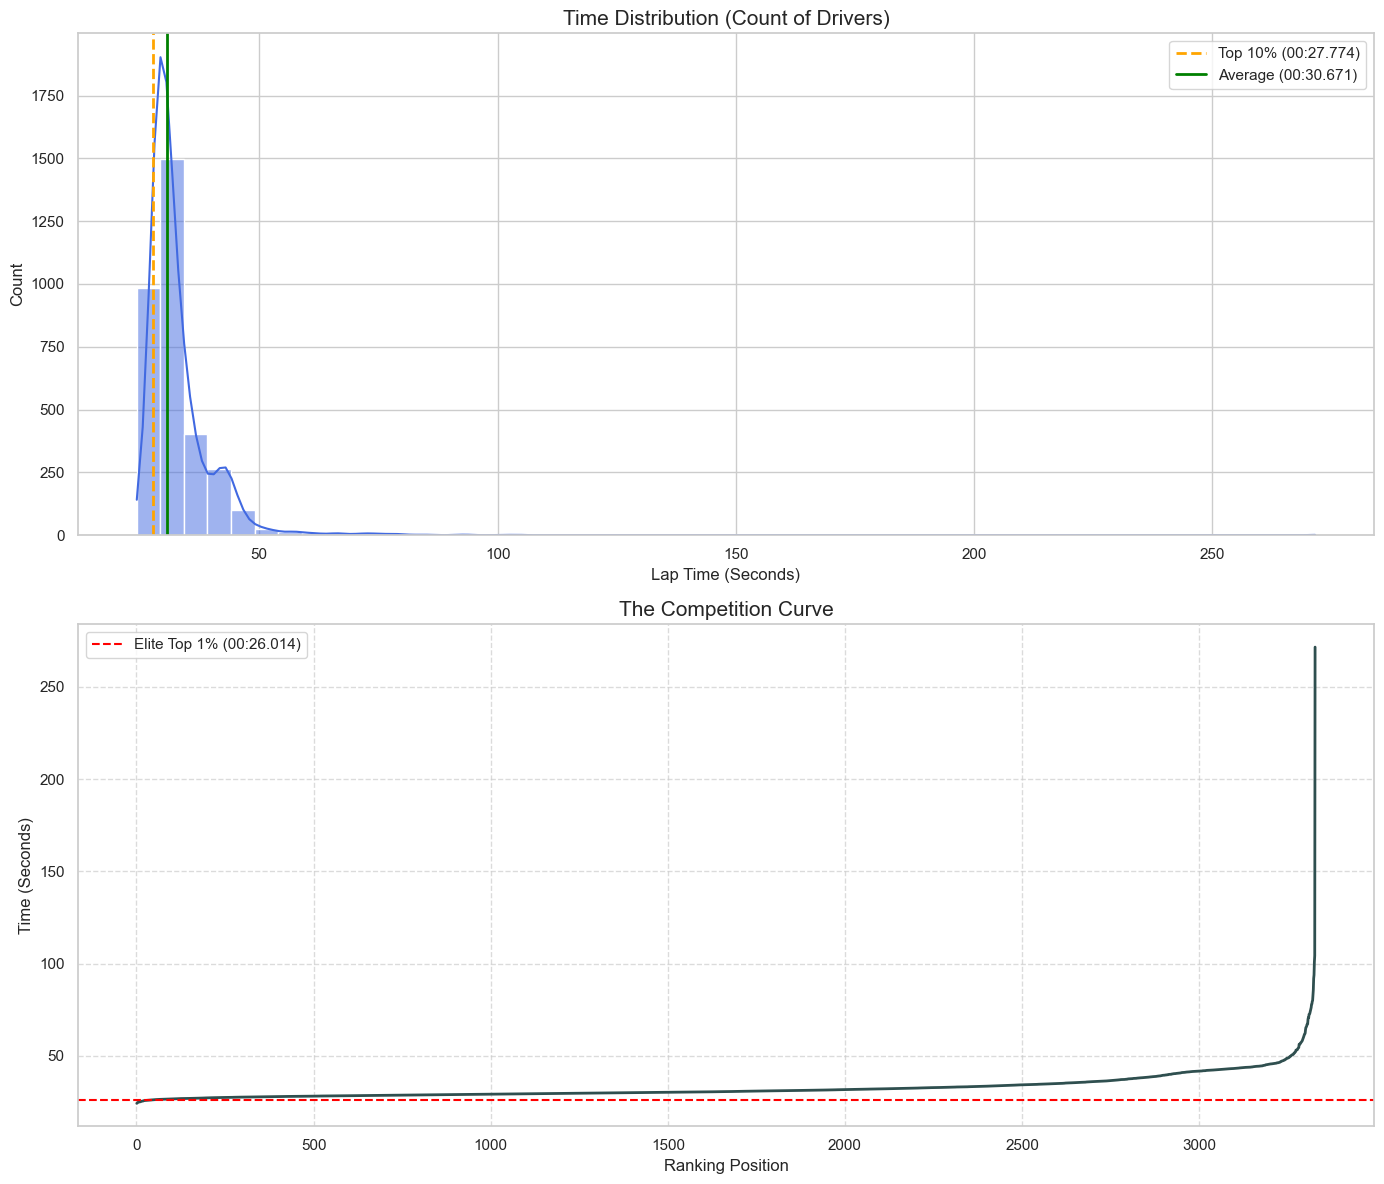

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. HELPER FUNCTION: Convert Seconds back to "MM:SS.ms" ---
def format_time(total_seconds):
    try:
        minutes = int(total_seconds // 60)
        seconds = total_seconds % 60
        # Format as 00:00.000
        return f"{minutes:02d}:{seconds:06.3f}"
    except:
        return "N/A"

# --- 2. RE-CALCULATE STATISTICS ---
# We assume 'df' and 'Seconds' column still exist from your previous step.
df = df.sort_values('Seconds')

p1_val = df['Seconds'].min()
slowest_val = df['Seconds'].max()
median_val = df['Seconds'].median()

# Calculate Percentiles
top_1_val = df['Seconds'].quantile(0.01)
top_5_val = df['Seconds'].quantile(0.05)
top_10_val = df['Seconds'].quantile(0.10)

# --- 3. PRINT REPORT WITH CORRECT FORMAT ---
print("="*45)
print("      📊 DETAILED PERFORMANCE REPORT      ")
print("="*45)
print(f"Total Drivers:      {len(df)}")
print(f"World Record (P1):  {format_time(p1_val)}")
print(f"Slowest Time:       {format_time(slowest_val)}")
print("-" * 35)
print(f"🏆 ELITE (Top 1%):   Faster than {format_time(top_1_val)}")
print(f"🥇 PRO (Top 5%):     Faster than {format_time(top_5_val)}")
print(f"🥈 SEMI-PRO (Top 10%): Faster than {format_time(top_10_val)}")
print("-" * 35)
print(f"😐 AVERAGE (Median): {format_time(median_val)}")
print("="*45)

# --- 4. VISUALIZATION (Updated Legends) ---
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Graph 1: Distribution
sns.histplot(df['Seconds'], bins=50, kde=True, ax=ax1, color='royalblue')
ax1.axvline(top_10_val, color='orange', linestyle='--', linewidth=2, 
            label=f'Top 10% ({format_time(top_10_val)})')
ax1.axvline(median_val, color='green', linestyle='-', linewidth=2, 
            label=f'Average ({format_time(median_val)})')
ax1.set_title(f'Time Distribution (Count of Drivers)', fontsize=15)
ax1.set_xlabel('Lap Time (Seconds)', fontsize=12)
ax1.legend()

# Graph 2: The Curve
ax2.plot(range(1, len(df)+1), df['Seconds'], color='darkslategray', linewidth=2)
ax2.set_title('The Competition Curve', fontsize=15)
ax2.set_xlabel('Ranking Position', fontsize=12)
ax2.set_ylabel('Time (Seconds)', fontsize=12)
ax2.axhline(top_1_val, color='red', linestyle='--', 
            label=f'Elite Top 1% ({format_time(top_1_val)})')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

✅ Filter applied: Removed drivers slower than 01:45.000
📉 Records remaining: 3326 (Removed 1 outliers)
      📊 CLEANED PERFORMANCE REPORT (< 1:45)      
Total Drivers:      3326
World Record (P1):  00:24.296
Slowest (Cutoff):   01:44.348
-----------------------------------
🏆 ELITE (Top 1%):   Faster than 00:26.014
🥇 PRO (Top 5%):     Faster than 00:27.064
🥈 SEMI-PRO (Top 10%): Faster than 00:27.774
-----------------------------------
😐 AVERAGE (Median): 00:30.670


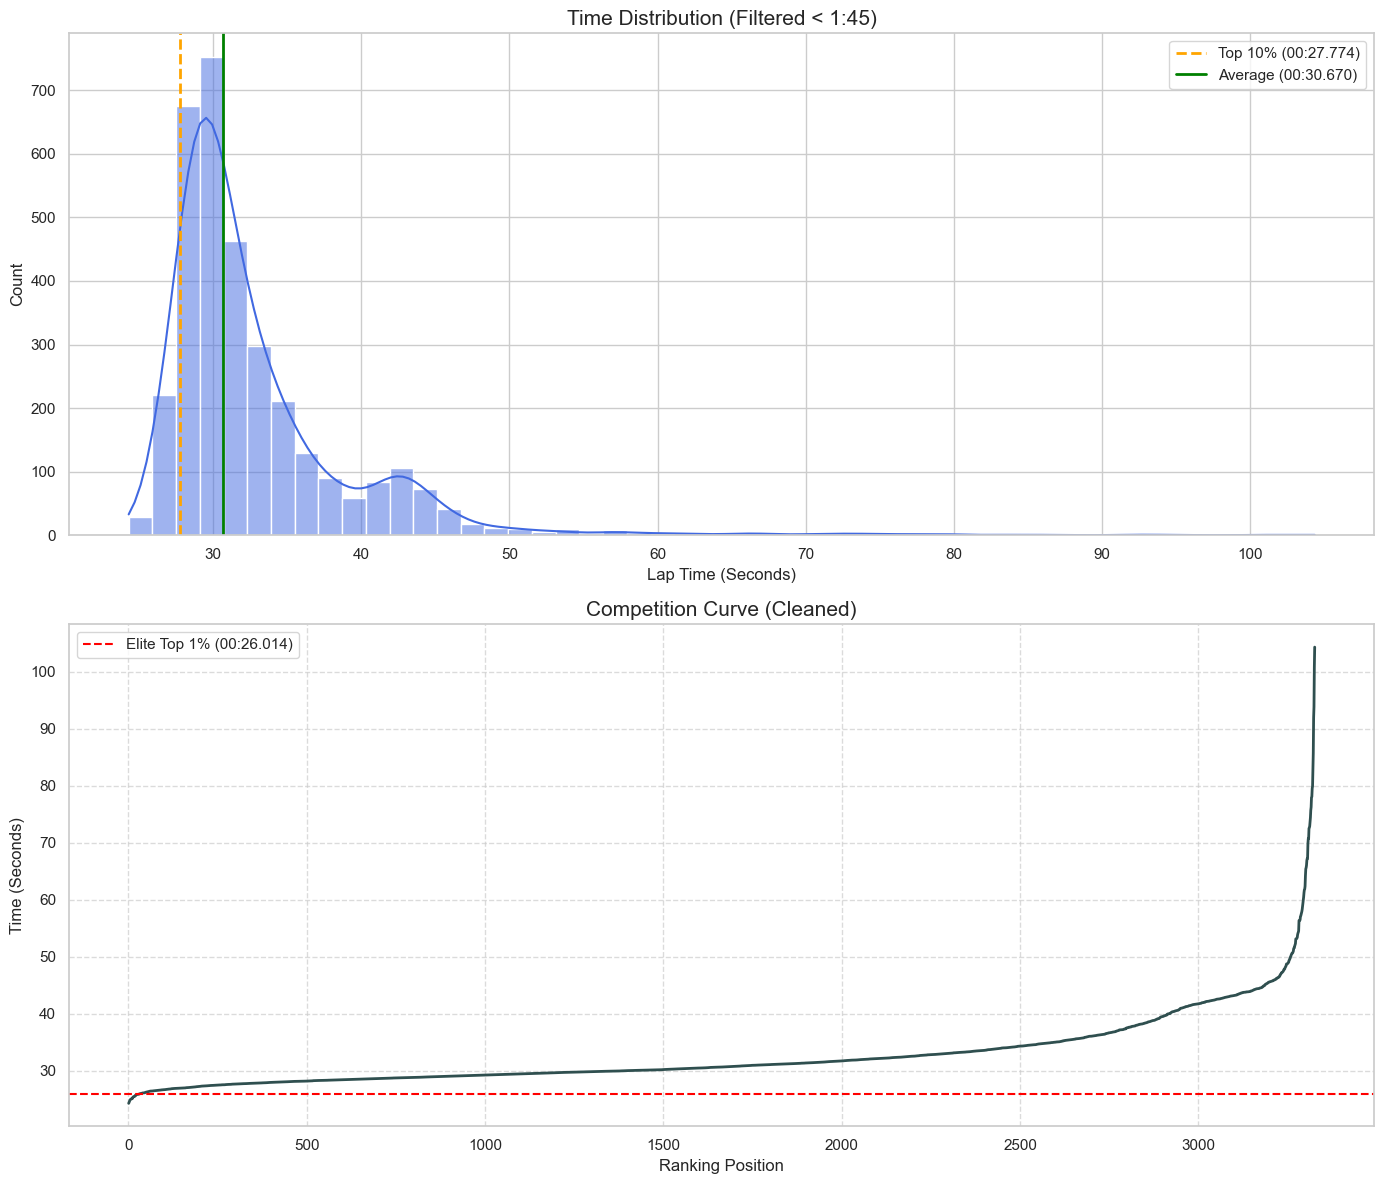

In [4]:
# --- 1. FILTERING THE DATA ---
# Limit: 01:45.000 -> 105 seconds
cutoff_seconds = 105.0

# Create a clean version of the data
df_clean = df[df['Seconds'] <= cutoff_seconds].copy()
df_clean = df_clean.sort_values('Seconds')

print(f"✅ Filter applied: Removed drivers slower than 01:45.000")
print(f"📉 Records remaining: {len(df_clean)} (Removed {len(df) - len(df_clean)} outliers)")

# --- 2. RE-CALCULATE STATISTICS ON CLEAN DATA ---
stats = df_clean['Seconds'].describe(percentiles=[0.01, 0.05, 0.10, 0.50])

p1_val = df_clean['Seconds'].min()
slowest_val = df_clean['Seconds'].max()
median_val = stats['50%']
top_1_val = stats['1%']
top_5_val = stats['5%']
top_10_val = stats['10%']

# Function to format time (MM:SS.ms)
def format_time(total_seconds):
    try:
        minutes = int(total_seconds // 60)
        seconds = total_seconds % 60
        return f"{minutes:02d}:{seconds:06.3f}"
    except:
        return "N/A"

# --- 3. PRINT REPORT ---
print("="*50)
print("      📊 CLEANED PERFORMANCE REPORT (< 1:45)      ")
print("="*50)
print(f"Total Drivers:      {len(df_clean)}")
print(f"World Record (P1):  {format_time(p1_val)}")
print(f"Slowest (Cutoff):   {format_time(slowest_val)}")
print("-" * 35)
print(f"🏆 ELITE (Top 1%):   Faster than {format_time(top_1_val)}")
print(f"🥇 PRO (Top 5%):     Faster than {format_time(top_5_val)}")
print(f"🥈 SEMI-PRO (Top 10%): Faster than {format_time(top_10_val)}")
print("-" * 35)
print(f"😐 AVERAGE (Median): {format_time(median_val)}")
print("="*50)

# --- 4. VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Graph 1: Distribution (Now much cleaner without outliers)
sns.histplot(df_clean['Seconds'], bins=50, kde=True, ax=ax1, color='royalblue')
ax1.axvline(top_10_val, color='orange', linestyle='--', linewidth=2, 
            label=f'Top 10% ({format_time(top_10_val)})')
ax1.axvline(median_val, color='green', linestyle='-', linewidth=2, 
            label=f'Average ({format_time(median_val)})')
ax1.set_title(f'Time Distribution (Filtered < 1:45)', fontsize=15)
ax1.set_xlabel('Lap Time (Seconds)', fontsize=12)
ax1.legend()

# Graph 2: The Curve
ax2.plot(range(1, len(df_clean)+1), df_clean['Seconds'], color='darkslategray', linewidth=2)
ax2.set_title('Competition Curve (Cleaned)', fontsize=15)
ax2.set_xlabel('Ranking Position', fontsize=12)
ax2.set_ylabel('Time (Seconds)', fontsize=12)
ax2.axhline(top_1_val, color='red', linestyle='--', 
            label=f'Elite Top 1% ({format_time(top_1_val)})')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

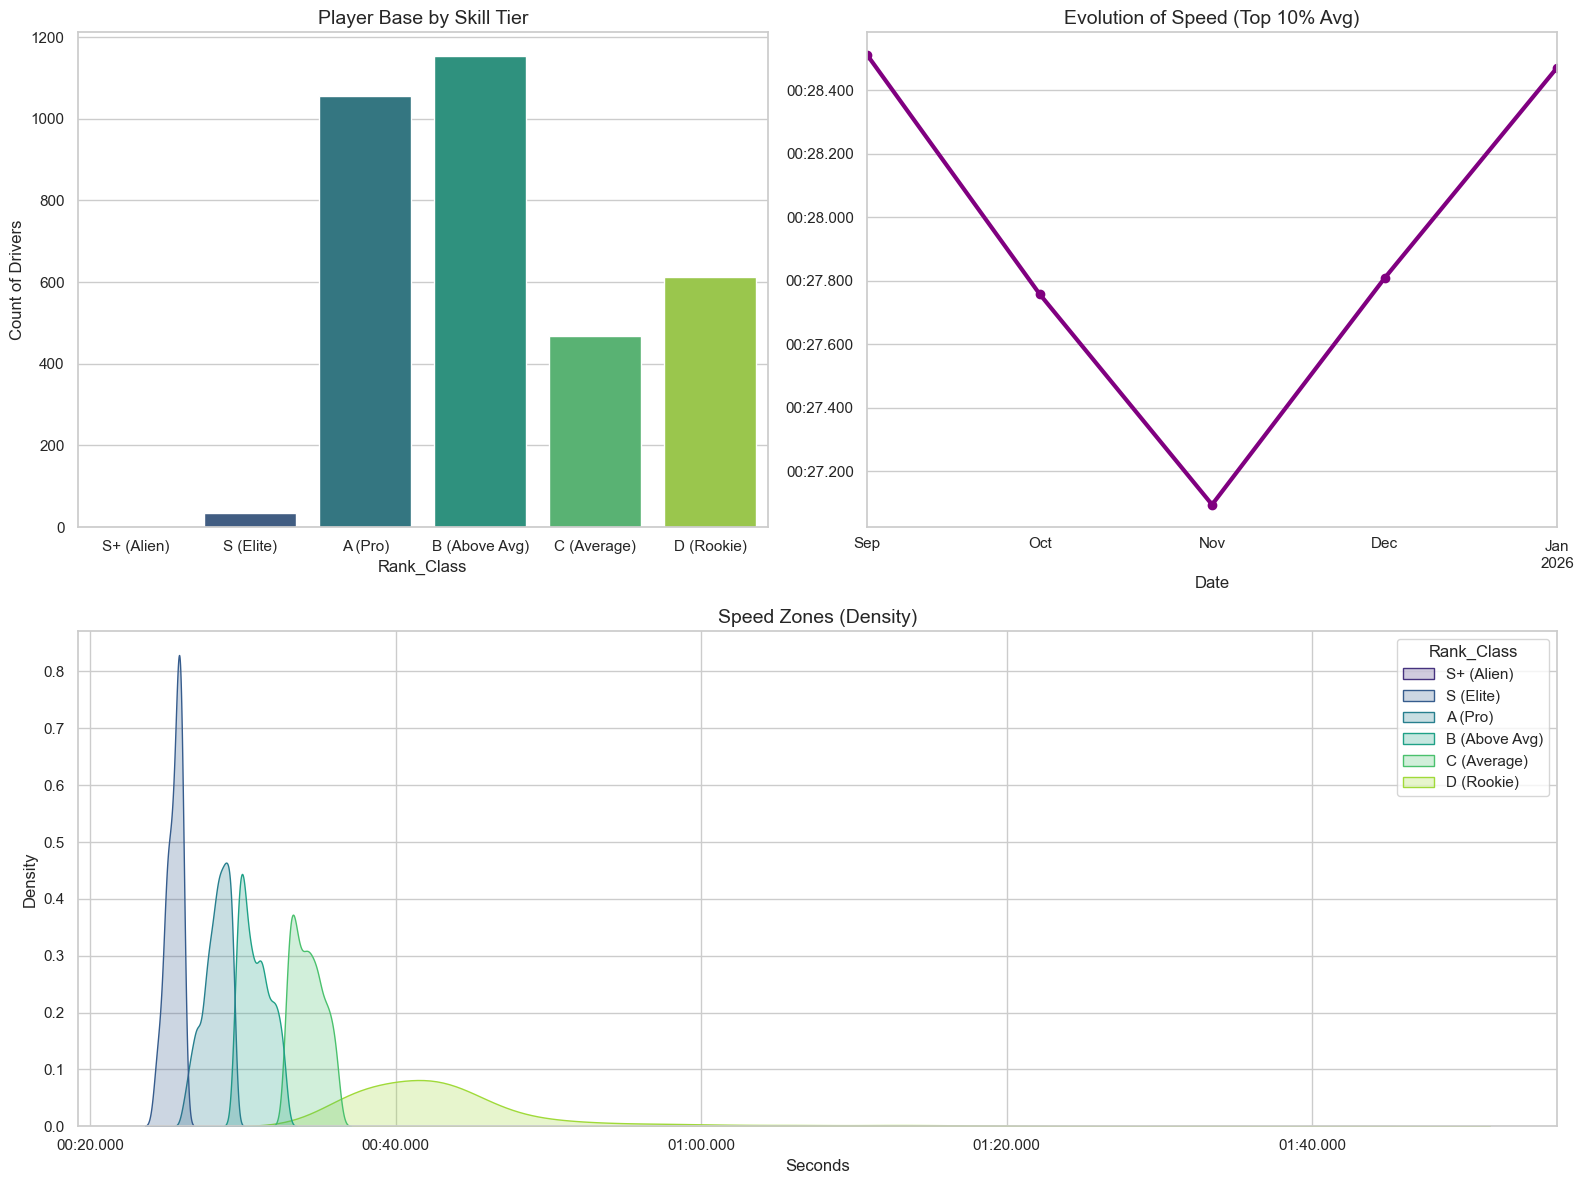

      🕵️ DEEP DIVE INSIGHTS      
The 'Meta' Time (Most Common): 00:28.029
Drivers in S-Tier (Elite):     35
Drivers in A-Tier (Pro):       1056
--------------------------------------------------
📅 Recent Monthly Trends (Top 10% Avg):
   - November 2025: 00:27.095
   - December 2025: 00:27.808
   - January 2026: 00:28.471


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# --- 1. HELPER: Time Formatter ---
def format_time(x, pos=None):
    # 'pos' is required by matplotlib formatters, even if unused
    try:
        minutes = int(x // 60)
        seconds = x % 60
        return f"{minutes:02d}:{seconds:06.3f}"
    except:
        return ""

# --- 2. DATA PREP ---
# Ensure we use the clean data
if 'df_clean' not in locals():
    cutoff = 105.0
    df_clean = df[df['Seconds'] <= cutoff].copy()

# Ensure Date is datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True, errors='coerce')
df_clean = df_clean.dropna(subset=['Date'])

# --- 3. CALCULATIONS ---
# Tier Logic
mean_time = df_clean['Seconds'].mean()
std_dev = df_clean['Seconds'].std()

def get_rank(time_val):
    z_score = (time_val - mean_time) / std_dev
    if z_score < -1.5: return "S+ (Alien)"
    if z_score < -1.0: return "S (Elite)"
    if z_score < -0.5: return "A (Pro)"
    if z_score < 0.0:  return "B (Above Avg)"
    if z_score < 0.5:  return "C (Average)"
    return "D (Rookie)"

df_clean['Rank_Class'] = df_clean['Seconds'].apply(get_rank)
rank_order = ["S+ (Alien)", "S (Elite)", "A (Pro)", "B (Above Avg)", "C (Average)", "D (Rookie)"]
rank_counts = df_clean['Rank_Class'].value_counts().reindex(rank_order)

# Trend Logic (Top 10% Average per Month)
evolution = df_clean.set_index('Date')
monthly_trend = evolution.resample('ME')['Seconds'].quantile(0.10)

# --- 4. VISUALIZATION (With Readable Time Axis) ---
fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(2, 2, figure=fig)

# CHART 1: Tier List
ax1 = fig.add_subplot(grid[0, 0])
sns.barplot(x=rank_counts.index, y=rank_counts.values, hue=rank_counts.index, palette='viridis', legend=False, ax=ax1)
ax1.set_title("Player Base by Skill Tier", fontsize=14)
ax1.set_ylabel("Count of Drivers")
ax1.bar_label(ax1.containers[0])

# CHART 2: Track Evolution
ax2 = fig.add_subplot(grid[0, 1])
if len(monthly_trend) > 0:
    monthly_trend.plot(kind='line', marker='o', color='purple', linewidth=3, ax=ax2)
    ax2.set_title("Evolution of Speed (Top 10% Avg)", fontsize=14)
    ax2.set_xlabel("Date")
    # APPLY TIME FORMATTER TO Y-AXIS
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    ax2.grid(True)
else:
    ax2.text(0.5, 0.5, "Insufficient Data for Trend", ha='center')

# CHART 3: Density "The Wall"
ax3 = fig.add_subplot(grid[1, :])
sns.kdeplot(data=df_clean, x='Seconds', hue='Rank_Class', hue_order=rank_order, 
            fill=True, palette='viridis', common_norm=False, ax=ax3)
ax3.set_title("Speed Zones (Density)", fontsize=14)
# APPLY TIME FORMATTER TO X-AXIS
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

plt.tight_layout()
plt.show()

# --- 5. PRINT INSIGHTS (READABLE FORMAT) ---
print("="*50)
print("      🕵️ DEEP DIVE INSIGHTS      ")
print("="*50)

# Mode (Most common time)
meta_time_sec = df_clean['Seconds'].mode()[0]
print(f"The 'Meta' Time (Most Common): {format_time(meta_time_sec)}")

# Counts
s_tier_count = len(df_clean[df_clean['Rank_Class'].str.contains('S')])
a_tier_count = len(df_clean[df_clean['Rank_Class'] == 'A (Pro)'])
print(f"Drivers in S-Tier (Elite):     {s_tier_count}")
print(f"Drivers in A-Tier (Pro):       {a_tier_count}")

print("-" * 50)
print("📅 Recent Monthly Trends (Top 10% Avg):")
# Loop to print formatted times
if len(monthly_trend) > 0:
    for date, val in monthly_trend.tail(3).items():
        # Check if val is a number (not NaN)
        if pd.notnull(val):
            date_str = date.strftime('%B %Y')
            print(f"   - {date_str}: {format_time(val)}")
else:
    print("   Not enough data to show trends.")
print("="*50)

In [6]:
import pandas as pd

# --- 1. DATA PREP ---
# We use the 'df_clean' from previous steps
if 'df_clean' not in locals():
    print("⚠️ Please run the previous analysis block first to generate 'df_clean'.")
else:
    # --- 2. CALCULATE GAPS & RANKS ---
    # Gap to Leader (P1)
    p1_time = df_clean['Seconds'].min()
    df_clean['Gap to P1'] = df_clean['Seconds'] - p1_time

    # Interval (Gap to car ahead)
    df_clean['Interval'] = df_clean['Seconds'].diff().fillna(0)
    
    # Define Battle Groups (Round to nearest 0.1s to find clusters)
    df_clean['Battle Zone'] = df_clean['Seconds'].round(1)

    # Helper format function
    def fmt(x): 
        return f"{int(x//60):02d}:{x%60:06.3f}"

    # --- 3. DISPLAY INSIGHTS ---
    print("="*60)
    print("      ⚔️ RIVALRY & BATTLE REPORT      ")
    print("="*60)

    # Insight A: The "Photo Finishes" (Smallest Intervals)
    print("🔥 TOP 5 CLOSEST BATTLES (The Photo Finishes):")
    # We ignore the first row (P1 has no one ahead)
    battles = df_clean.iloc[1:].nsmallest(5, 'Interval')
    
    for i, row in battles.iterrows():
        p_now = row['Position']
        p_prev = df_clean.loc[i-1, 'Position'] if (i-1) in df_clean.index else "Unknown"
        # Find name of driver ahead
        try:
            name_ahead = df_clean.loc[i-1, 'Name']
        except:
            name_ahead = "Previous Driver"
            
        print(f"   ► P{p_now} {row['Name']} finished just {row['Interval']:.4f}s behind {name_ahead}")

    print("-" * 60)

    # Insight B: The "War Zone" (Where most people are stuck)
    # Count how many drivers are in each 0.1s bucket
    zone_counts = df_clean['Battle Zone'].value_counts()
    toughest_zone = zone_counts.idxmax()
    count_in_zone = zone_counts.max()
    
    print("💥 THE WAR ZONE (Most Crowded Time):")
    print(f"   The most competitive lap time is approx: {fmt(toughest_zone)}")
    print(f"   There are {count_in_zone} drivers stuck in this specific tenth of a second.")
    print(f"   (Breaking out of this zone passes {count_in_zone} people instantly!)")

    print("="*60)
    print("      🏆 FINAL CLASSIFICATION (TOP 10 PREVIEW)      ")
    print("="*60)

    # --- 4. DISPLAY TABLE IN NOTEBOOK ---
    # Create a nice view for display
    view_df = df_clean[['Position', 'Name', 'Seconds', 'Gap to P1', 'Rank_Class']].copy()
    
    # Format the columns for display
    view_df['Best Time'] = view_df['Seconds'].apply(fmt)
    view_df['Gap'] = view_df['Gap to P1'].apply(lambda x: f"+{x:.3f}s" if x > 0 else "-")
    
    # Reorder columns
    final_view = view_df[['Position', 'Name', 'Best Time', 'Gap', 'Rank_Class']]
    
    # Display top 15 rows directly in Jupyter
    # (If you want to see specific rows, use .iloc[start:end])
    display(final_view.head(15))
    
    print(f"... and {len(df_clean)-15} more records.")

      ⚔️ RIVALRY & BATTLE REPORT      
🔥 TOP 5 CLOSEST BATTLES (The Photo Finishes):
   ► P43 Sukma Ballz finished just 0.0000s behind Fahad Latif
   ► P73 Haadi Salam finished just 0.0000s behind Usayd Ather
   ► P86 umar khalil finished just 0.0000s behind Shykh Bilal
   ► P89 Mustafa Uppal finished just 0.0000s behind Haris Nasir
   ► P100 Wasif Malik finished just 0.0000s behind Ali Zahid
------------------------------------------------------------
💥 THE WAR ZONE (Most Crowded Time):
   The most competitive lap time is approx: 00:30.100
   There are 64 drivers stuck in this specific tenth of a second.
   (Breaking out of this zone passes 64 people instantly!)
      🏆 FINAL CLASSIFICATION (TOP 10 PREVIEW)      


,Position,Name,Best Time,Gap,Rank_Class
0,1,M Baloch,00:24.296,-,S (Elite)
1,2,Ahmad Waleed,00:24.458,+0.162s,S (Elite)
2,3,Rai Ibtisam Ahmed,00:24.646,+0.350s,S (Elite)
3,4,Awc .,00:24.776,+0.480s,S (Elite)
4,5,Hamza Pasha,00:24.925,+0.629s,S (Elite)
5,6,MUZAMMIL -,00:24.966,+0.670s,S (Elite)
6,7,KJQ -,00:25.037,+0.741s,S (Elite)
7,8,Talha Azhar,00:25.072,+0.776s,S (Elite)
8,9,MUHAMMAD HARIS,00:25.083,+0.787s,S (Elite)
9,10,Hassan Butt,00:25.090,+0.794s,S (Elite)


... and 3311 more records.


      🏛️ THE HALL OF FAME (History of the WR)      
These drivers held the World Record at some point in history:


,Date Broken,Name,Record Time,Days Reigned
0,2025-09-09,Teodor Ivanchev,00:33.727,8
1,2025-09-17,Zaman Shah,00:27.163,10
2,2025-09-27,Fahad Waheed,00:26.922,0
3,2025-09-27,Nasri Khan,00:26.333,15
4,2025-10-12,Taha Goheer,00:25.859,10
5,2025-10-22,Talha Azhar,00:25.072,54
6,2025-12-15,KJQ -,00:25.037,9
7,2025-12-24,Hamza Pasha,00:24.925,7
8,2025-12-31,Rai Ibtisam Ahmed,00:24.646,1
9,2026-01-01,Ahmad Waleed,00:24.458,0


------------------------------------------------------------
      🏎️ REALITY CHECK (Assuming 50 km/h avg speed)
------------------------------------------------------------
P1 M  Baloch crosses the line... 🏁
P2 Ahmad Waleed is 2.2 meters behind (0.5 car lengths)
P3 Rai Ibtisam Ahmed is 4.9 meters behind (1.1 car lengths)
P4 Awc . is 6.7 meters behind (1.5 car lengths)
P5 Hamza Pasha is 8.7 meters behind (1.9 car lengths)
P6 MUZAMMIL - is 9.3 meters behind (2.1 car lengths)
P7 KJQ - is 10.3 meters behind (2.3 car lengths)
P8 Talha Azhar is 10.8 meters behind (2.4 car lengths)
P9 MUHAMMAD HARIS is 10.9 meters behind (2.4 car lengths)
P10 Hassan Butt is 11.0 meters behind (2.5 car lengths)


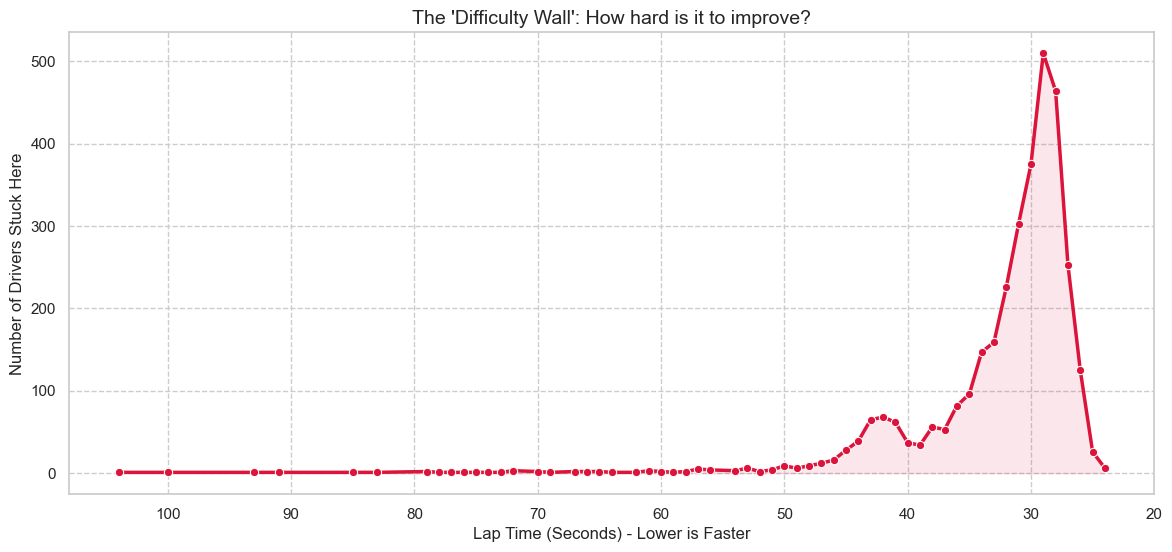

📈 CHART EXPLAINED: The higher the spike, the harder it is to break out of that time.
   If there is a massive spike at 64s (1:04), that is the 'Average Wall'.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PREP DATA ---
if 'df_clean' not in locals():
    print("⚠️ Please run the previous analysis block first to generate 'df_clean'.")
else:
    # Ensure sorted by date to track history
    df_clean = df_clean.sort_values('Date')
    
    # --- ANALYSIS 1: HALL OF FAME (Record Progression) ---
    current_record = 9999.0 # Start high
    record_holders = []

    for index, row in df_clean.iterrows():
        time = row['Seconds']
        if time < current_record:
            current_record = time
            record_holders.append({
                'Date Broken': row['Date'],
                'Name': row['Name'],
                'New Record': row['Seconds'],
                'Days Held': 0 # Placeholder
            })
    
    # Convert to DataFrame
    hof_df = pd.DataFrame(record_holders)
    
    # Calculate how long they held it (Difference between dates)
    hof_df['Next Date'] = hof_df['Date Broken'].shift(-1)
    # Fill the last one with Today's date (Current WR holder)
    hof_df['Next Date'] = hof_df['Next Date'].fillna(pd.Timestamp.now())
    hof_df['Days Reigned'] = (hof_df['Next Date'] - hof_df['Date Broken']).dt.days

    # Formatting time for display
    def fmt(x): return f"{int(x//60):02d}:{x%60:06.3f}"
    hof_df['Record Time'] = hof_df['New Record'].apply(fmt)

    # --- ANALYSIS 2: DISTANCE GAP (Visualizer) ---
    # Assumption: Average speed of 80 km/h (approx 22.2 meters/second)
    # Adjust this speed based on your specific track/car!
    avg_speed_kph = 50 
    speed_mps = avg_speed_kph * 1000 / 3600
    
    # Calculate distance behind P1 for the top 10
    top_10 = df_clean.sort_values('Seconds').head(10).copy()
    top_10['Gap Seconds'] = top_10['Seconds'] - top_10['Seconds'].iloc[0]
    top_10['Meters Behind'] = top_10['Gap Seconds'] * speed_mps
    top_10['Car Lengths'] = top_10['Meters Behind'] / 4.5 # Avg car is 4.5m

    # --- PRINT RESULTS ---
    print("="*60)
    print("      🏛️ THE HALL OF FAME (History of the WR)      ")
    print("="*60)
    print("These drivers held the World Record at some point in history:")
    
    # Display Hall of Fame Table
    display(hof_df[['Date Broken', 'Name', 'Record Time', 'Days Reigned']])
    
    print("-" * 60)
    print(f"      🏎️ REALITY CHECK (Assuming {avg_speed_kph} km/h avg speed)")
    print("-" * 60)
    
    for i, row in top_10.iterrows():
        if row['Position'] == 1:
            print(f"P1 {row['Name']} crosses the line... 🏁")
        else:
            meters = row['Meters Behind']
            cars = row['Car Lengths']
            print(f"P{row['Position']} {row['Name']} is {meters:.1f} meters behind ({cars:.1f} car lengths)")

    # --- VISUALIZATION: The Cost of Speed ---
    # Plotting how many people are stuck at each second marker
    plt.figure(figsize=(14, 6))
    
    # Round to nearest integer second to see difficulty buckets
    df_clean['Second_Bucket'] = df_clean['Seconds'].astype(int)
    difficulty = df_clean['Second_Bucket'].value_counts().sort_index()
    
    sns.lineplot(x=difficulty.index, y=difficulty.values, marker='o', color='crimson', linewidth=2.5)
    plt.title("The 'Difficulty Wall': How hard is it to improve?", fontsize=14)
    plt.xlabel("Lap Time (Seconds) - Lower is Faster")
    plt.ylabel("Number of Drivers Stuck Here")
    plt.gca().invert_xaxis() # Faster times on the right
    plt.grid(True, linestyle='--')
    plt.fill_between(difficulty.index, difficulty.values, color='crimson', alpha=0.1)
    
    plt.show()
    print("📈 CHART EXPLAINED: The higher the spike, the harder it is to break out of that time.")
    print("   If there is a massive spike at 64s (1:04), that is the 'Average Wall'.")